In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
# from tqdm import

In [2]:
connectivity_min, connectivity_max = 0.1,65
random_input_span = (9.5,13.5)

total_time = 1000

neuron_model = 'Rotational'
model_folder_name = neuron_model+'_ensembles'

# Capture related ensembles

In [3]:
def list_folders_in_path(path):
    return [ name for name in os.listdir( path ) if os.path.isdir( os.path.join(path, name) ) ]

In [4]:
num_neurons = 10000
target_networks_name = 'N{}_T{}_I{}_{}'.format(num_neurons,total_time,random_input_span[0],random_input_span[1])
target_path = os.path.join(model_folder_name,target_networks_name)
all_g_folders = list_folders_in_path(target_path)
desired_g_folders = all_g_folders

# delay_folder_name = 'd_{}'.format(delay)

In [5]:
sigma_glossary_dict = {}
amin_saman_param_glossary_dict = {}
field_period_glossary_dict = {}

In [6]:
for g_folder in desired_g_folders:
    available_d_folders = list_folders_in_path(os.path.join(target_path,g_folder))

    g = float( g_folder.split('_')[1] ) #folder names are g_# d_#
    
    sigma_glossary_dict[g] = {}
    amin_saman_param_glossary_dict[g] = {}
    field_period_glossary_dict[g] = {}
    
    for d_folder in available_d_folders:
        delay = float( d_folder.split('_')[1] ) #folder names are d_#
        
        g_d_path = os.path.join(target_path, g_folder, d_folder)

        try:
            g_ensembles_list = list_folders_in_path(g_d_path)
            

            sigma_glossary_dict[g].update( {delay:[]} )
            amin_saman_param_glossary_dict[g].update( {delay:[]} )
            field_period_glossary_dict[g].update( {delay:[]} )
        except: #if the given connectivity and delay has not been measured even once
            continue

        for ensemble_num in g_ensembles_list:
            ensemble_path = os.path.join(g_d_path, ensemble_num)
            with open( os.path.join(ensemble_path,'sigma.txt') ) as file:
                sigma = float( file.readline() )
                sigma_glossary_dict[g][delay].append( sigma )

            with open( os.path.join(ensemble_path,'field_period.txt') ) as file:
                field_period = float( file.readline() )
                field_period_glossary_dict[g][delay].append( field_period )                

            if neuron_model == 'Rotational': #if not does not exist
                with open( os.path.join(ensemble_path,'amin_saman_param.txt') ) as file:
                    amin_saman_param = float( file.readline() )        
                    amin_saman_param_glossary_dict[g][delay].append( amin_saman_param )        


        sigma_glossary_dict[g][delay] = np.mean(sigma_glossary_dict[g][delay])
        amin_saman_param_glossary_dict[g][delay] = np.mean(amin_saman_param_glossary_dict[g][delay])
        field_period_glossary_dict[g][delay] = np.mean(field_period_glossary_dict[g][delay])


# Sigma dataframe

In [7]:
sigma_table = pd.DataFrame.from_dict(sigma_glossary_dict)
sigma_table.index.name = 'delay'
sigma_table.columns.name = 'connectivity'
sigma_table

connectivity,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
delay,,,,,,,,,,
0.05,0.057125,0.056771,0.057661,0.058204,0.059874,0.061261,0.060488,0.060764,0.061464,0.063279
0.07,0.067603,0.068600,0.070219,0.070883,0.072979,0.076906,0.086968,0.152248,0.212416,0.230498
0.09,0.073196,0.075404,0.078707,0.082677,0.104070,0.265255,0.294238,0.306964,0.313212,0.315644
0.11,0.075362,0.079723,0.090510,0.268009,0.337127,0.357625,0.365583,0.368117,0.368805,0.366584
0.13,0.078321,0.085924,0.288655,0.380983,0.402043,0.408980,0.411024,0.410050,0.409559,0.408753
0.15,0.088398,0.102484,0.402998,0.432772,0.443195,0.445259,0.472668,0.460529,0.459319,0.451570
0.17,0.090389,0.379816,0.450184,0.464794,0.472336,0.474523,0.475587,0.474338,0.475130,0.479185
0.19,0.098020,0.445415,0.480736,0.494101,0.498192,0.500468,0.501643,0.502904,1.032881,1.025997
0.21,0.102812,0.479611,0.506725,0.516473,0.519014,0.521058,0.526149,1.061895,1.050609,1.012582


Text(0.5, 1, 'Sigma as an Order parameter')

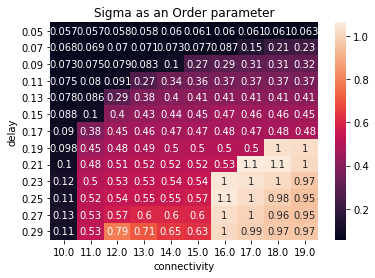

In [8]:
ax_sigma = sns.heatmap(sigma_table, annot=True)
ax_sigma.set_title('Sigma as an Order parameter')

# Field period dataframe

In [9]:
field_period_table = pd.DataFrame.from_dict(field_period_glossary_dict)
field_period_table.index.name = 'delay'
field_period_table.columns.name = 'connectivity'
field_period_table

connectivity,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
delay,,,,,,,,,,
0.05,0.160,0.105,0.135,0.095,0.170,0.185,0.170,0.120,0.140,0.150
0.07,0.170,0.190,0.175,0.185,0.185,0.175,0.175,0.180,0.200,0.200
0.09,0.190,0.165,0.215,0.225,0.195,0.220,0.210,0.230,0.230,0.240
0.11,0.235,0.180,0.195,0.240,0.250,0.260,0.245,0.275,0.270,0.250
0.13,0.220,0.285,0.265,0.275,0.270,0.315,0.280,0.275,0.365,0.280
0.15,0.250,0.285,0.295,0.290,0.340,0.300,0.300,0.340,0.350,0.390
0.17,0.195,0.320,0.345,0.345,0.345,0.360,0.385,0.330,0.410,0.420
0.19,0.340,0.365,0.345,0.350,0.395,0.355,0.355,0.435,0.385,0.400
0.21,0.365,0.380,0.395,0.415,0.375,0.440,0.385,0.860,0.880,0.420


Text(0.5, 1, 'Field period time')

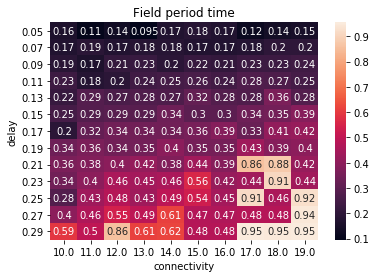

In [10]:
ax_field_period = sns.heatmap(field_period_table, annot=True)
ax_field_period.set_title('Field period time')

# Amin Saman Parameter

Text(0.5, 1, 'AminSaman as an Order parameter ')

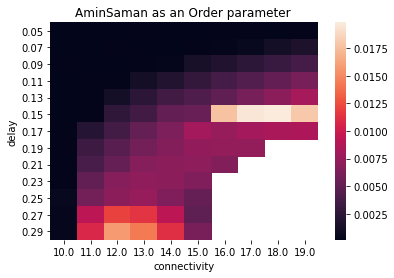

In [11]:
amin_saman_param_table = pd.DataFrame.from_dict(amin_saman_param_glossary_dict)
amin_saman_param_table.index.name = 'delay'
amin_saman_param_table.columns.name = 'connectivity'
ax_field_period = sns.heatmap(amin_saman_param_table)
ax_field_period.set_title('AminSaman as an Order parameter ')